<a href="https://colab.research.google.com/github/bibin001/pytorch-tutorial-1/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
#Dataset: iris flower available in https://archive.ics.uci.edu/dataset/53/iris
#To clasify the iris flower in any one of the three classes.
#Create a model class that inherits nn.Module
class Model(nn.Module):
  #input layer (4 feature of flower) -->
  #Hidden layer 1(some number of neurons) -->
  #Hidden layer 1(some number of neurons) -->
  #output(3 classes)
  def __init__(self, in_features=4, H1=8, H2=9, out_features=3):
    super().__init__() #instantiate our nn.Module
    self.fc1=nn.Linear(in_features,H1)
    self.fc2=nn.Linear(H1,H2)
    self.out=nn.Linear(H2,out_features)

  def forward(self, x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.out(x)

    return x

In [ ]:
#manual seed for randomization
torch.manual_seed(5)

#Create instance of our model
model= Model()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
iris_df=pd.read_csv(url)
iris_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [ ]:
#Change last column from string to integer
iris_df['variety']=iris_df['variety'].replace('Setosa',0.0)
iris_df['variety']=iris_df['variety'].replace('Versicolor',1.0)
iris_df['variety']=iris_df['variety'].replace('Virginica',2.0)

In [ ]:
#Train Test Split, Split X, Y

X=iris_df.drop('variety', axis=1)
y=iris_df['variety']

In [ ]:
#converting X and y to numpy arrays
X=X.values
y=y.values

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
#Train Test Split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
#convert X features to float tensors
X_train= torch.FloatTensor(X_train)
X_test= torch.FloatTensor(X_test)

#convert y labels to long tensors
y_train= torch.LongTensor(y_train)
y_test= torch.LongTensor(y_test)

In [ ]:
#set the criteria of the model to measure the error, how far off the predictions are from the data
criterion=nn.CrossEntropyLoss()

#choose Adam optimized and learning rate
optimizer=torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
#Train our model
#Epochs (one run though all the training data throught out network)
epochs=100
losses=[]

for i in range(epochs):
  #Go forward and make prediction
  y_pred=model.forward(X_train) #get predicted results

  #measure the loss/error
  loss=criterion(y_pred, y_train) #predicted value vs y train value
  losses.append(loss.detach().numpy())

  #print every 10 epoch

  if i % 10 == 0:
    print(f'Epoch: {i}, Loss: {loss}')

  #backpropagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0, Loss: 1.2123159170150757
Epoch: 10, Loss: 0.8761737942695618
Epoch: 20, Loss: 0.5855649709701538
Epoch: 30, Loss: 0.3808237910270691
Epoch: 40, Loss: 0.26266178488731384
Epoch: 50, Loss: 0.1600523442029953
Epoch: 60, Loss: 0.09869159013032913
Epoch: 70, Loss: 0.07223097234964371
Epoch: 80, Loss: 0.060009539127349854
Epoch: 90, Loss: 0.053219158202409744


Text(0.5, 0, 'Epochs')

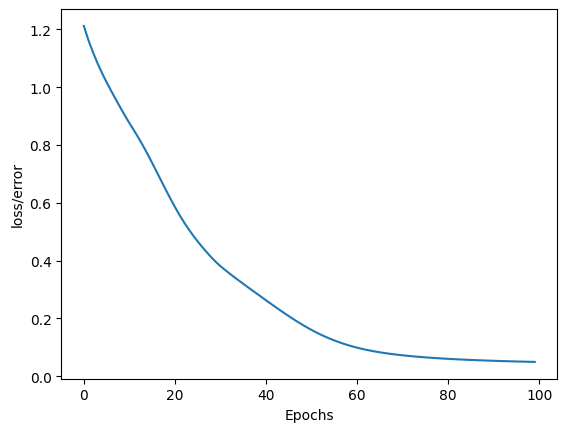

In [ ]:
#Graph
plt.plot(range(epochs), losses)
plt.ylabel('loss/error')
plt.xlabel('Epochs')

In [ ]:
#evaluate model on test data
with torch.no_grad(): #Turns off backpropagation
  y_eval=model.forward(X_test)
  loss=criterion(y_eval, y_test)


In [ ]:
loss

tensor(0.0990)

In [ ]:
correct=0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val=model.forward(data)



    #Will what type of flowe class our network think it was
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]}')

    #correct or not
    if y_val.argmax().item() == y_test[i]:
      correct+=1

print(f'We got {correct} correct!')



1.) tensor([-0.9995,  5.3231, -2.6823]) 	 1
2.) tensor([-7.2381,  2.0133,  7.4106]) 	 2
3.) tensor([-8.5932,  1.2117,  9.6473]) 	 2
4.) tensor([ 11.9981,   5.6114, -18.4107]) 	 0
5.) tensor([-9.1563,  1.9118,  9.8739]) 	 2
6.) tensor([ 0.4072,  4.7904, -4.0917]) 	 1
7.) tensor([ 12.0155,   6.1227, -18.8493]) 	 0
8.) tensor([-4.8879,  3.2636,  3.6692]) 	 1
9.) tensor([ 11.4902,   6.1024, -18.2728]) 	 0
10.) tensor([-3.9019,  3.3740,  2.3851]) 	 1
11.) tensor([-3.6843,  3.6951,  1.8740]) 	 1
12.) tensor([-5.2902,  3.3957,  4.0144]) 	 2
13.) tensor([-8.5239,  2.2643,  8.7831]) 	 2
14.) tensor([-8.9014,  2.1257,  9.3447]) 	 2
15.) tensor([ 11.7361,   5.9940, -18.4600]) 	 0
16.) tensor([ 11.0382,   6.0275, -17.7510]) 	 0
17.) tensor([-5.7392,  3.2659,  4.6313]) 	 2
18.) tensor([-8.5223,  2.5094,  8.5854]) 	 2
19.) tensor([ 12.8249,   6.1296, -19.7608]) 	 0
20.) tensor([ 12.1754,   6.0372, -18.9325]) 	 0
21.) tensor([-1.1440,  5.5555, -2.6738]) 	 1
22.) tensor([-8.6752,  1.5932,  9.4618]) 	 

In [ ]:
#testing with new image (for now we will have onle features)

new_iris=torch.tensor([4.5,6.0,1.34,2.33])
with torch.no_grad():
  print(model(new_iris))

tensor([ 11.6704,   4.7379, -17.4097])


In [ ]:
new_iris1=torch.tensor([6.0,3.2,5.3,2.3])
with torch.no_grad():
  print(model(new_iris1))


tensor([-7.9663,  1.6146,  8.6327])


In [ ]:
#save our model
torch.save(model.state_dict(), 'iris_flower_identifier_model.pt')

In [ ]:
#Load the saved model
new_model=Model()
new_model.load_state_dict(torch.load('iris_flower_identifier_model.pt'))

<All keys matched successfully>